In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gpiosenka_musical_instruments_image_classification_path = kagglehub.dataset_download('gpiosenka/musical-instruments-image-classification')

print('Data source import complete.')
print('Data source path:', gpiosenka_musical_instruments_image_classification_path)


c:\Users\Nouran\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.
Data source path: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1


In [3]:
print(f"The dataset has been downloaded to: {gpiosenka_musical_instruments_image_classification_path}")

# Optionally, you can also check the directory structure
import os
print("Files in the dataset directory:")
print(os.listdir(gpiosenka_musical_instruments_image_classification_path))

The dataset has been downloaded to: C:\Users\Nouran\.cache\kagglehub\datasets\gpiosenka\musical-instruments-image-classification\versions\1
Files in the dataset directory:
['6 test samples', 'class_dict.csv', 'EfficientNetB3-instruments-99.33.h5', 'instruments.csv', 'test', 'train', 'valid']


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Basic imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import random
from keras.utils import img_to_array, load_img
from keras.models import Sequential  # Fixed typo: 'Sequentials' → 'Sequential'
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,GlobalAveragePooling2D  # Fixed typo: 'flatten' → 'Flatten'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Fixed typo: 'Earlystopping' → 'EarlyStopping'
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# Adjusting paths to the dataset after downloading it from Kaggle
train_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train"
test_path = "C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test"


# Verify the paths
import os
print(f"Train Path: {train_path}")
print(f"Test Path: {test_path}")

# Check if directories exist
print("Train directory exists:", os.path.exists(train_path))
print("Test directory exists:", os.path.exists(test_path))


Train Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train
Test Path: C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test
Train directory exists: True
Test directory exists: True


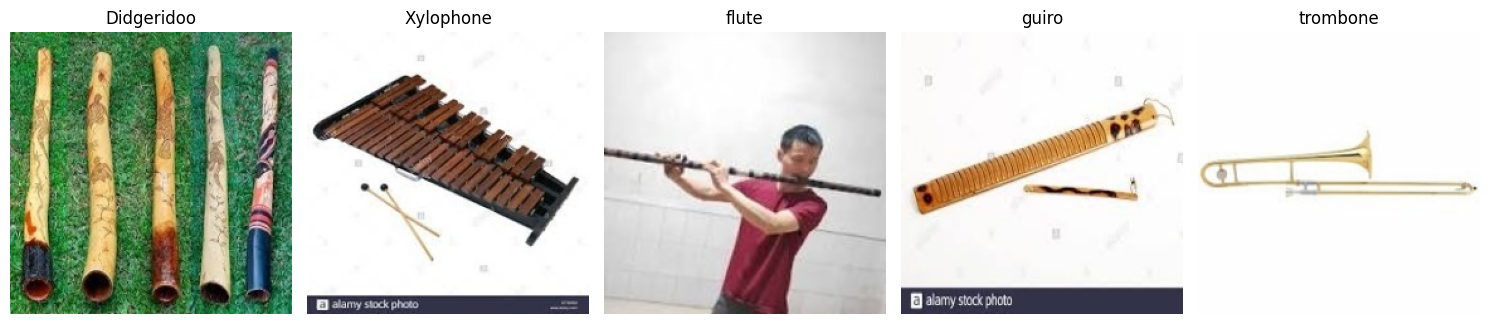

In [6]:
from tensorflow.keras.utils import load_img
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img

class_folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

# Pick 5 random classes (or all if less than 5)
random_classes = random.sample(class_folders, min(5, len(class_folders)))

# Plot settings
plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(random_classes):
    class_path = os.path.join(train_path, class_name)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)
        img = load_img(img_path)

        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

Number of classes: 30


Text(0.5, 0, 'Class Names')

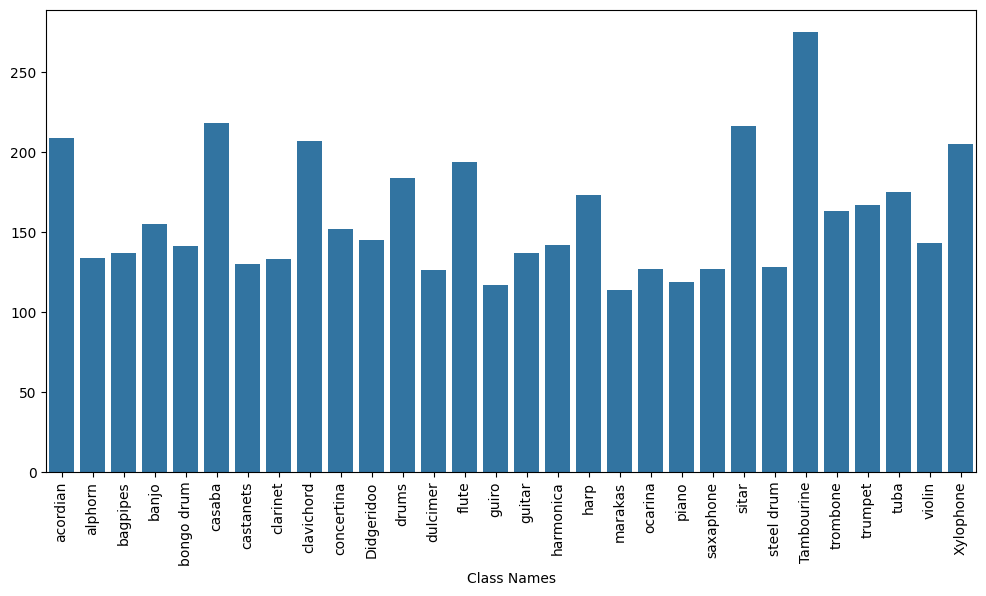

In [7]:
# Check the number of classes in the dataset
num_classes = len(class_folders)
print(f"Number of classes: {num_classes}")
# Check the number of images in each class
class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}
# Plot the class distribution
plt.figure(figsize=(12, 6))
# Plotting the class distribution
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class Names')


In [8]:
# Check the number of images in the training and test directories
train_images = len(os.listdir(train_path))
test_images = len(os.listdir(test_path))
print(f"Number of training images: {train_images}")
print(f"Number of test images: {test_images}")


Number of training images: 30
Number of test images: 30


In [9]:
# Check the number of images in each class in the training set
train_class_counts = {folder: len(os.listdir(os.path.join(train_path, folder))) for folder in class_folders}
print("Number of images in each class in the training set:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")
# Check the number of images in each class in the test set
test_class_counts = {folder: len(os.listdir(os.path.join(test_path, folder))) for folder in class_folders}
print("Number of images in each class in the test set:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")
# Set image dimensions
img_width, img_height = 150, 150

Number of images in each class in the training set:
acordian: 209 images
alphorn: 134 images
bagpipes: 137 images
banjo: 155 images
bongo drum: 141 images
casaba: 218 images
castanets: 130 images
clarinet: 133 images
clavichord: 207 images
concertina: 152 images
Didgeridoo: 145 images
drums: 184 images
dulcimer: 126 images
flute: 194 images
guiro: 117 images
guitar: 137 images
harmonica: 142 images
harp: 173 images
marakas: 114 images
ocarina: 127 images
piano: 119 images
saxaphone: 127 images
sitar: 216 images
steel drum: 128 images
Tambourine: 275 images
trombone: 163 images
trumpet: 167 images
tuba: 175 images
violin: 143 images
Xylophone: 205 images
Number of images in each class in the test set:
acordian: 5 images
alphorn: 5 images
bagpipes: 5 images
banjo: 5 images
bongo drum: 5 images
casaba: 5 images
castanets: 5 images
clarinet: 5 images
clavichord: 5 images
concertina: 5 images
Didgeridoo: 5 images
drums: 5 images
dulcimer: 5 images
flute: 5 images
guiro: 5 images
guitar: 5 i

In [10]:
#Parameters
input_shape = (224, 224, 3)
BatchSize = 64
seed = 42
num_classes = 30

In [11]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [12]:
# Data Generator for Training Data
train_generator = train_datagen.flow_from_directory(train_path,
                                                      target_size=input_shape[:2],
                                                      batch_size=BatchSize,
                                                      class_mode='categorical',
                                                      seed=seed)

Found 4793 images belonging to 30 classes.


In [13]:
# Data Generator for Validation Data
validation_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Data Generator for Validation Data
validation_generator = validation_datagen.flow_from_directory(test_path,
                                                                target_size=input_shape[:2],
                                                                batch_size=BatchSize,
                                                                class_mode='categorical',
                                                                seed=seed)

Found 150 images belonging to 30 classes.


In [15]:
# Check the class indices
class_indices = train_generator.class_indices

In [16]:
# Check the class indices
print("Class Indices:")
print(class_indices)

Class Indices:
{'Didgeridoo': 0, 'Tambourine': 1, 'Xylophone': 2, 'acordian': 3, 'alphorn': 4, 'bagpipes': 5, 'banjo': 6, 'bongo drum': 7, 'casaba': 8, 'castanets': 9, 'clarinet': 10, 'clavichord': 11, 'concertina': 12, 'drums': 13, 'dulcimer': 14, 'flute': 15, 'guiro': 16, 'guitar': 17, 'harmonica': 18, 'harp': 19, 'marakas': 20, 'ocarina': 21, 'piano': 22, 'saxaphone': 23, 'sitar': 24, 'steel drum': 25, 'trombone': 26, 'trumpet': 27, 'tuba': 28, 'violin': 29}


In [18]:
# Check the number of classes
num_classes = len(class_indices)
print("Number of Classes:")
print(num_classes)


Number of Classes:
30


In [19]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
predictions = Dense(num_classes, activation='softmax')(x)



17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [26]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,892,702 (14.85 MB)

 Trainable params: 663,838 (2.53 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [21]:
# Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [22]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_images // BatchSize,
    validation_data=validation_generator,
    validation_steps=test_images // BatchSize,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.0490 - loss: 4.0205 - val_accuracy: 0.4933 - val_loss: 2.7141 - learning_rate: 1.0000e-04
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.1787 - loss: 2.9900 - val_accuracy: 0.7000 - val_loss: 1.9442 - learning_rate: 1.0000e-04
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3231 - loss: 2.4643 - val_accuracy: 0.8467 - val_loss: 1.1791 - learning_rate: 1.0000e-04
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4521 - loss: 1.9789 - val_accuracy: 0.8867 - val_loss: 0.7442 - learning_rate: 1.0000e-04
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5571 - loss: 1.5620 - val_accuracy: 0.9000 - val_loss: 0.4917 - learning_rate: 1.0000e-04
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 732ms/step - accuracy: 0.6068 - loss: 1.3285 - val_accuracy: 0.9333 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 54s 722ms/step - accuracy: 0.6732 -

In [23]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False

In [24]:
# Recompile the model for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=train_images // BatchSize,
    validation_data=validation_generator,
    validation_steps=test_images // BatchSize,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.9320 - loss: 0.2133 - val_accuracy: 0.9933 - val_loss: 0.0208 - learning_rate: 1.0000e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9408 - loss: 0.1904 - val_accuracy: 0.9933 - val_loss: 0.0218 - learning_rate: 1.0000e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9439 - loss: 0.1935 - val_accuracy: 0.9933 - val_loss: 0.0225 - learning_rate: 1.0000e-05
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9360 - loss: 0.2101 - val_accuracy: 0.9933 - val_loss: 0.0220 - learning_rate: 1.0000e-05
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9321 - loss: 0.2047 - val_accuracy: 0.9867 - val_loss: 0.0234 - learning_rate: 1.0000e-05
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9448 - loss: 0.1737 - val_accuracy: 0.9867 - val_loss: 0.0246 - learning_rate: 1.0000e-05
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9334 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate TP, TN, FP, FN for each class
for i, class_label in enumerate(class_labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"\nClass: {class_label}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

NameError: name 'true_classes' is not defined